In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins = pd.read_csv('../Files/penguins.csv')
print(penguins)

     CulmenLength  CulmenDepth  FlipperLength  BodyMass  Species
0            39.1         18.7          181.0    3750.0        0
1            39.5         17.4          186.0    3800.0        0
2            40.3         18.0          195.0    3250.0        0
3             NaN          NaN            NaN       NaN        0
4            36.7         19.3          193.0    3450.0        0
..            ...          ...            ...       ...      ...
339          55.8         19.8          207.0    4000.0        2
340          43.5         18.1          202.0    3400.0        2
341          49.6         18.2          193.0    3775.0        2
342          50.8         19.0          210.0    4100.0        2
343          50.2         18.7          198.0    3775.0        2

[344 rows x 5 columns]


In [3]:
penguins = penguins.dropna()
print(penguins)

     CulmenLength  CulmenDepth  FlipperLength  BodyMass  Species
0            39.1         18.7          181.0    3750.0        0
1            39.5         17.4          186.0    3800.0        0
2            40.3         18.0          195.0    3250.0        0
4            36.7         19.3          193.0    3450.0        0
5            39.3         20.6          190.0    3650.0        0
..            ...          ...            ...       ...      ...
339          55.8         19.8          207.0    4000.0        2
340          43.5         18.1          202.0    3400.0        2
341          49.6         18.2          193.0    3775.0        2
342          50.8         19.0          210.0    4100.0        2
343          50.2         18.7          198.0    3775.0        2

[342 rows x 5 columns]


In [4]:
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
target = 'Species'
X, y = penguins[features], penguins[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0



y:


0      0
1      0
2      0
4      0
5      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 342, dtype: int64

##### Procent różnego gatunku

In [5]:
pd.Series(y).value_counts(normalize=True)

Species
0    0.441520
1    0.359649
2    0.198830
Name: proportion, dtype: float64

##### Sprawdźmy typy danych oraz czy są metody brakujące

In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        342 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


##### Sprawdzamy rozkłady

In [7]:
X.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##### Wykresy pudełkowe dla każdej zmiennej

Unique values: 164


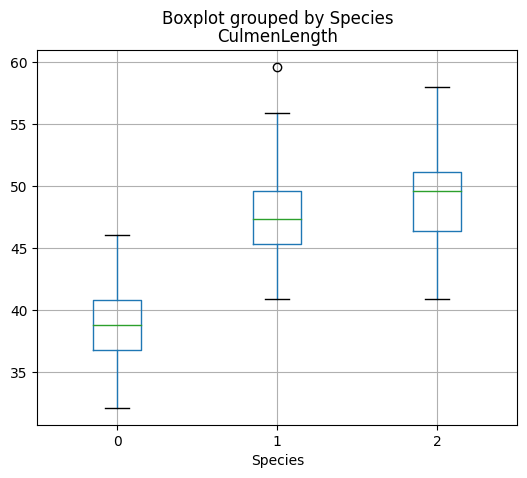

Unique values: 80


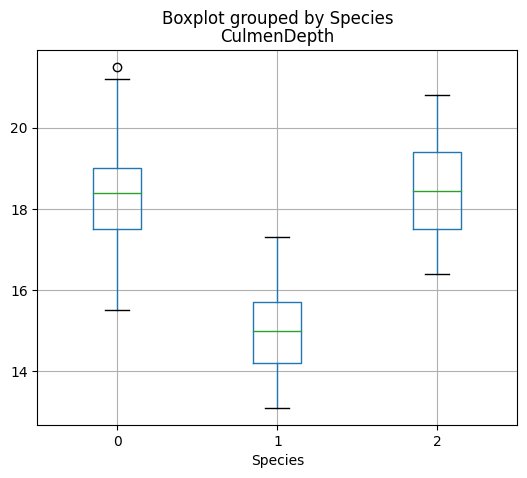

Unique values: 55


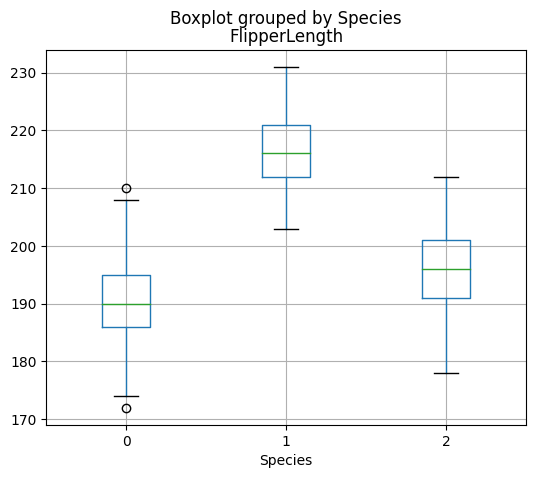

Unique values: 94


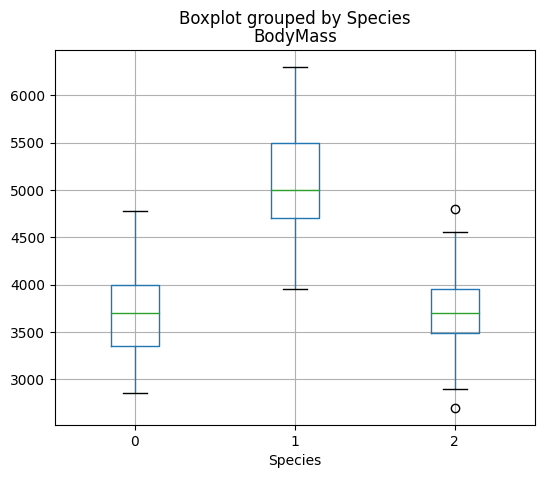

In [8]:
for col in features:
    print(f'Unique values: {len(penguins[col].unique())}')
    penguins.boxplot(column=col, by='Species', figsize=(6,5))
    plt.title(col)
    plt.show()

##### Histogramy w zależności od naszej zmiennej objaśnianej

In [9]:
# Powyżej 20 wykresów może konsumować zbyt dużo pamięci, dlatego zakomentowane
# for col in features:
#     plt.figure(figsize=(12, 2.5))
#     sns.displot(penguins.loc[penguins['Species']==0, col], kde=True, color='green', label='Species 0')
#     plt.legend(loc='upper right')
#     plt.figure(figsize=(12, 2.5))
#     sns.displot(penguins.loc[penguins['Species']==1, col], kde=True, color='red', label='Species 1')
#     plt.legend(loc='upper right')
#     plt.figure(figsize=(12, 2.5))
#     sns.displot(penguins.loc[penguins['Species']==2, col], kde=True, color='blue', label='Species 2')
#     plt.legend(loc='upper right')
#     plt.show()

##### Histogram

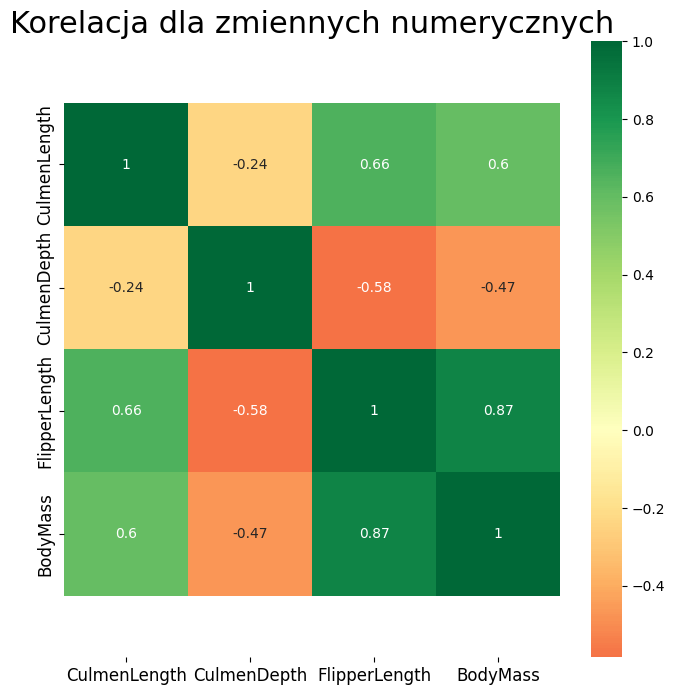

In [10]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)
plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#####  Współczynnik korelacji punktowo-dwuseryjnej (Point-biserial correlation coefficient) - wynika z tego, że gatunek najbardziej jest zależny od długości dzioba

In [11]:
from scipy import stats
corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

CulmenLength     0.779857
FlipperLength    0.357472
BodyMass         0.209717
CulmenDepth     -0.183090
dtype: float64

##### Podział na dane treningowe i dane testowe

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[['CulmenLength', 'FlipperLength']], y, test_size=0.30, random_state=0, stratify=y)
print('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 239
Testowe obserwacje: 103


##### Regresja Logistyczna

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression(multi_class='ovr')  # dodanie strategii OVR
model_lr.fit(X_train_standardized, y_train)

LogisticRegression(multi_class='ovr')

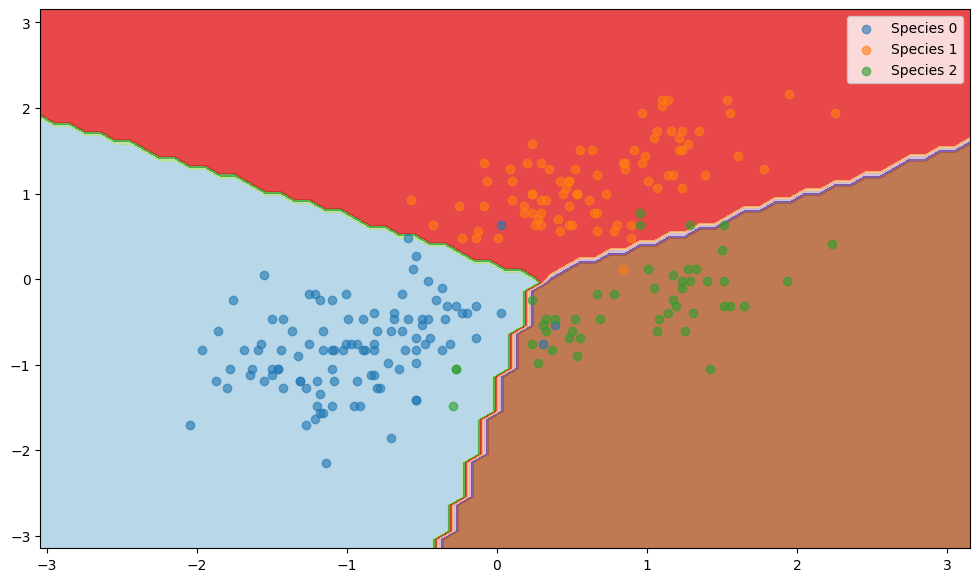

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    min2, max2 = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1, r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzje dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowanymi klasami
    plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.8)

    # tworzenie wykresu punktowego dla klas ze zbioru X
    unique_classes = np.unique(y_plot)
    for class_value in unique_classes:

        # przyporządkowanie klasy (y) do obserwacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego z różnymi kolorami i etykietami dla każdej klasy
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], alpha=0.6, label=f"Species {class_value}")

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

# Zakładając, że X_train_standardized, y_train i model_lr są wcześniej zdefiniowane dla trzech klas (0, 1, 2)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)


##### Macierz omyłek

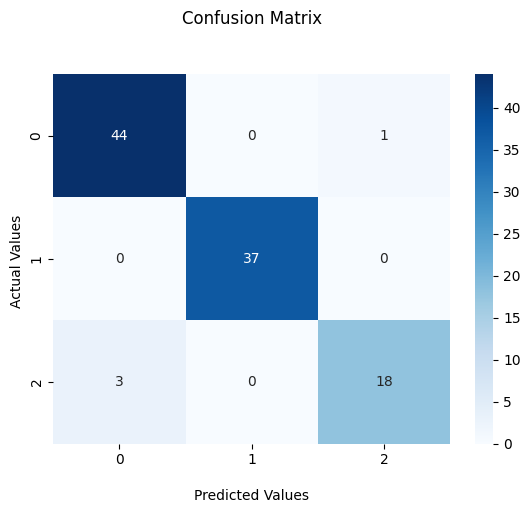

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_lr = model_lr.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

###### Nasz model łatwo sobie radzi z rozdzieleniem klas

##### Liczymy dokładność, precyzję, czułość oraz F1 score.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print('Precision:', precision_score(y_test, predictions_lr, average='macro'))
print('Recall: ', recall_score(y_test, predictions_lr, average='macro'))
print('F1_score: ', f1_score(y_test, predictions_lr, average='macro'))

Accuracy:  0.9611650485436893
Precision: 0.9611795446061963
Recall:  0.944973544973545
F1_score:  0.9521739130434782


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      1.00      1.00        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103



###### Funkcja rysująca najważniejsze modele

In [18]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    f1_metric = f1_score(y_checked, predictions, average='macro')
#    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1]) # ROC nie jest dla wielu klas
    metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame({'Model': [name], 'F1_score': [f1_metric]})], ignore_index=True)

    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      1.00      1.00        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103



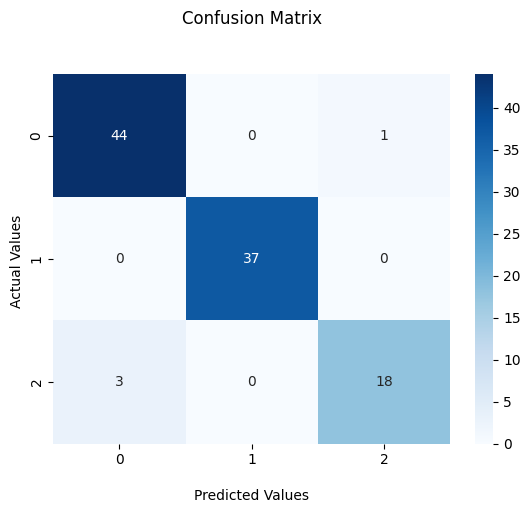

,Model,F1_score
0,Logistic Regression,0.952174


In [19]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

##### KNN (K Nearest Neighbours) - K najbliższych sąsiadów

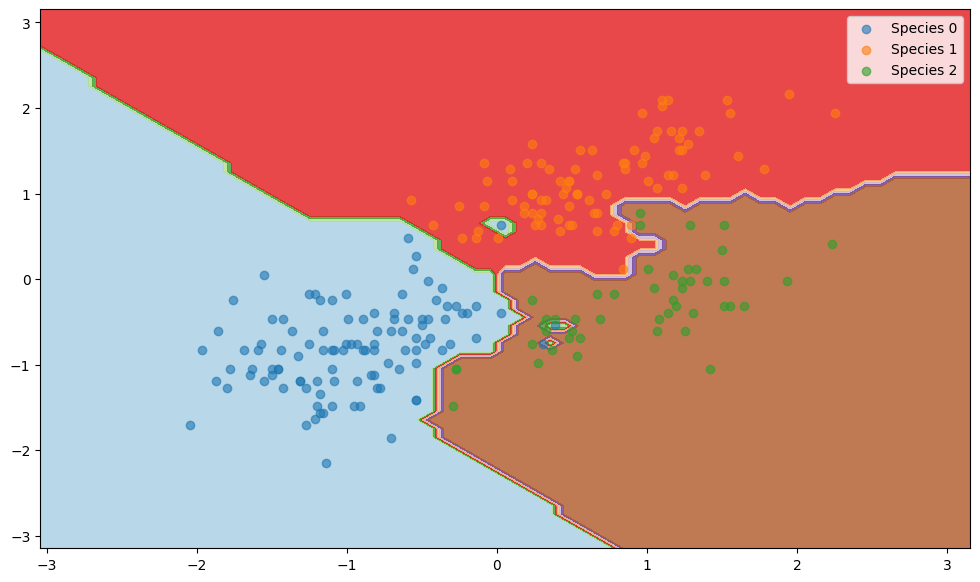

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Ustawiam minimalną liczbę sąsiadów na 1. Sposób pokazany w poprzednim zadaniu powoduje błąd
# The 'n_neighbors' parameter of KNeighborsClassifier must be an int in the range [1, inf) or None. Got 0 instead.
n_neighbors = max(1, int(X_train_standardized.shape[0] * 0.001))

model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
model_knn.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_knn)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       1.00      0.92      0.96        37
           2       0.79      0.90      0.84        21

    accuracy                           0.93       103
   macro avg       0.92      0.93      0.92       103
weighted avg       0.94      0.93      0.93       103



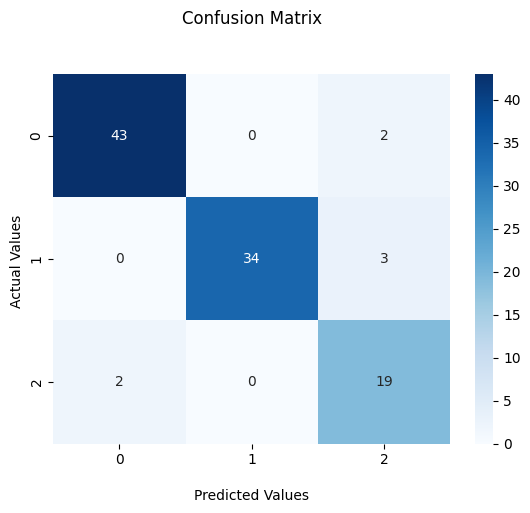

,Model,F1_score
0,Logistic Regression,0.952174
1,KNN,0.919249


In [25]:
calculate_metrics(model_knn, 'KNN', X_test_standardized, y_test)

##### Drzewo decyzyjne

In [28]:
from sklearn.tree import DecisionTreeClassifier

min_samples_leaf = max(1, int(X_train.shape[0] * 0.001))

model_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=min_samples_leaf)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

C:\Users\GTata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


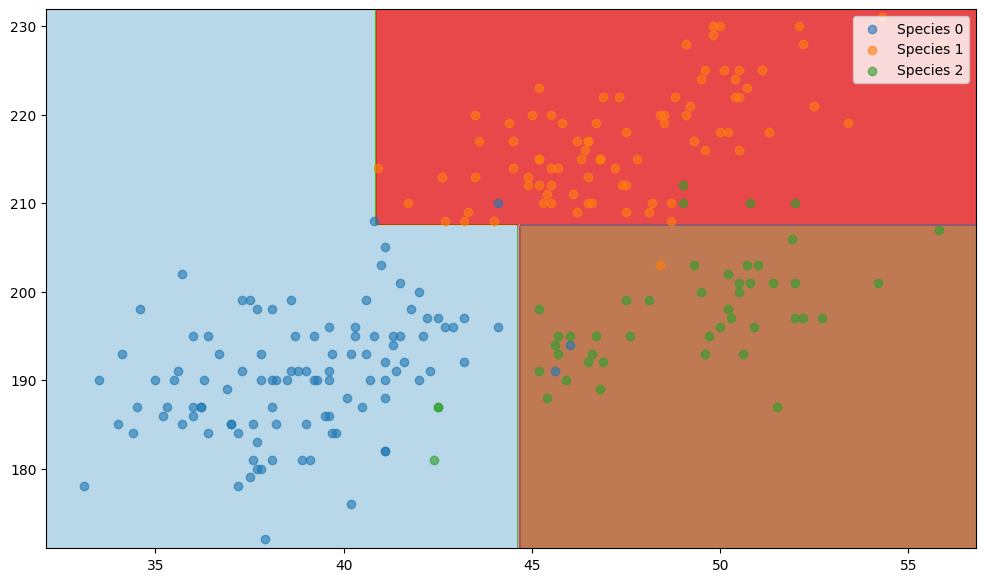

In [29]:
import numpy as np

plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_tree)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      0.97      0.99        37
           2       0.90      0.86      0.88        21

    accuracy                           0.95       103
   macro avg       0.95      0.94      0.94       103
weighted avg       0.95      0.95      0.95       103



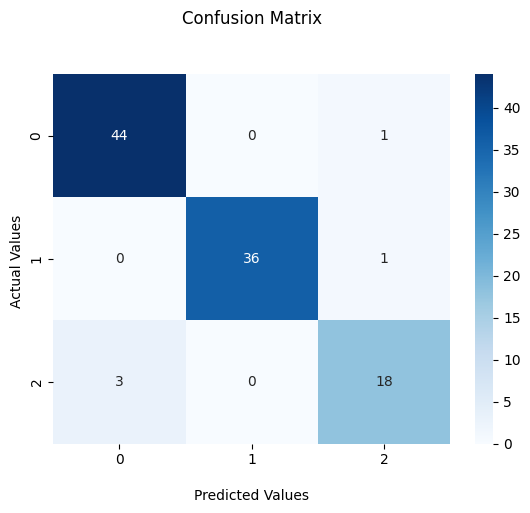

,Model,F1_score
0,Logistic Regression,0.952174
1,KNN,0.919249
2,Tree,0.940291


In [30]:
calculate_metrics(model_tree, 'Tree', X_test, y_test)

##### SVM (Support Vector Machines) - Maszyna wektorów nośnych

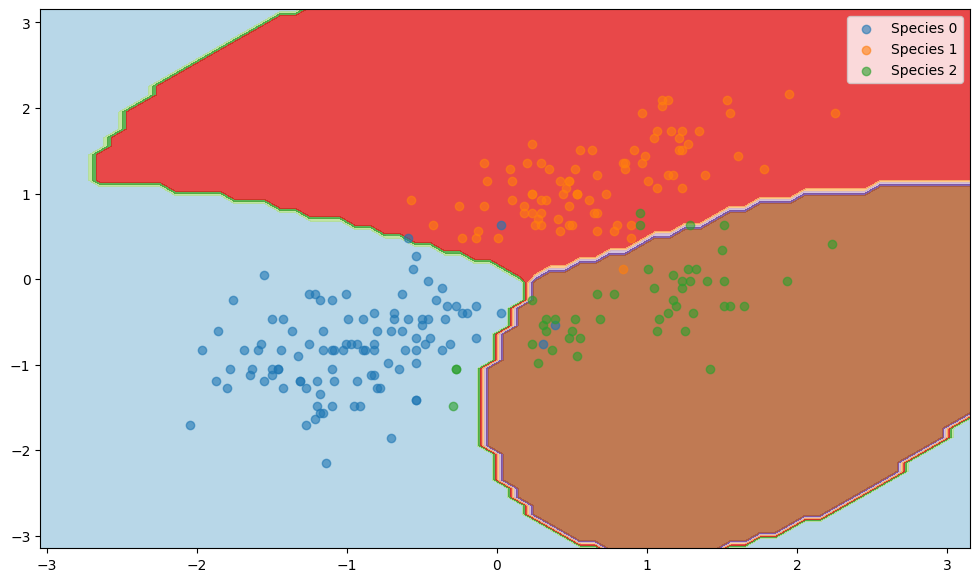

In [31]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_svm)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      1.00      1.00        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103



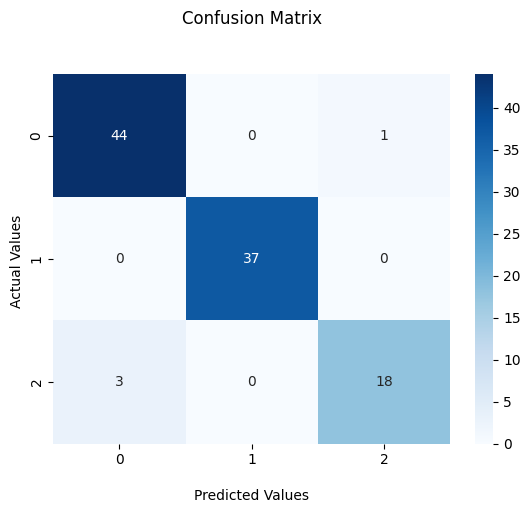

,Model,F1_score
0,Logistic Regression,0.952174
1,KNN,0.919249
2,Tree,0.940291
3,SVM,0.952174


In [32]:
calculate_metrics(model_svm, 'SVM', X_test_standardized, y_test)

##### Ilość Drzew Decyzyjnych w RandomForest

C:\Users\GTata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


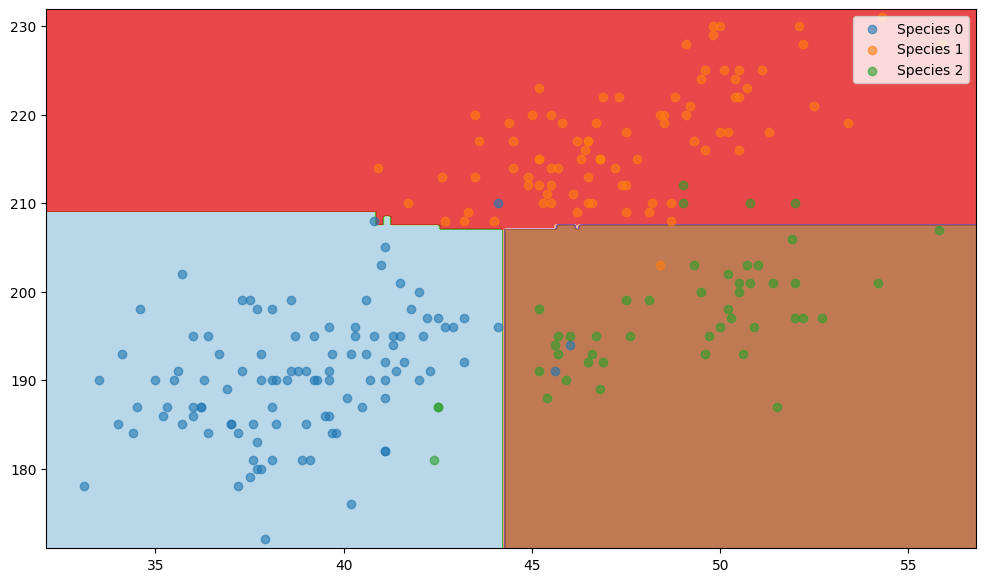

In [34]:
from sklearn.ensemble import RandomForestClassifier

min_samples_leaf = max(1, int(X_train.shape[0] * 0.001))

model_forest = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=min_samples_leaf)
model_forest.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_forest)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      0.97      0.99        37
           2       0.90      0.86      0.88        21

    accuracy                           0.95       103
   macro avg       0.95      0.94      0.94       103
weighted avg       0.95      0.95      0.95       103



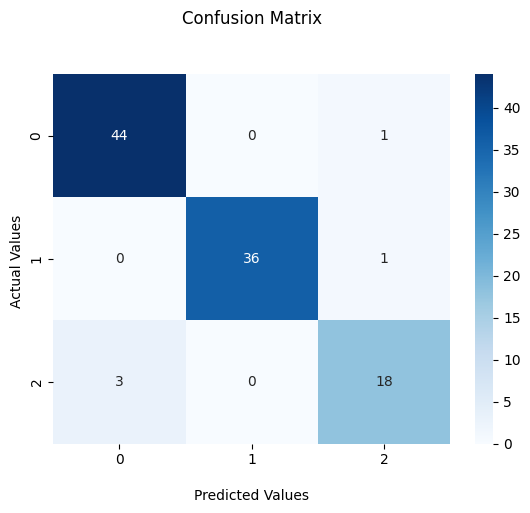

,Model,F1_score
0,Logistic Regression,0.952174
1,KNN,0.919249
2,Tree,0.940291
3,SVM,0.952174
4,Random Forest,0.940291


In [35]:
calculate_metrics(model_forest, 'Random Forest', X_test, y_test)

##### Boosting - AdaBoost

C:\Users\GTata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


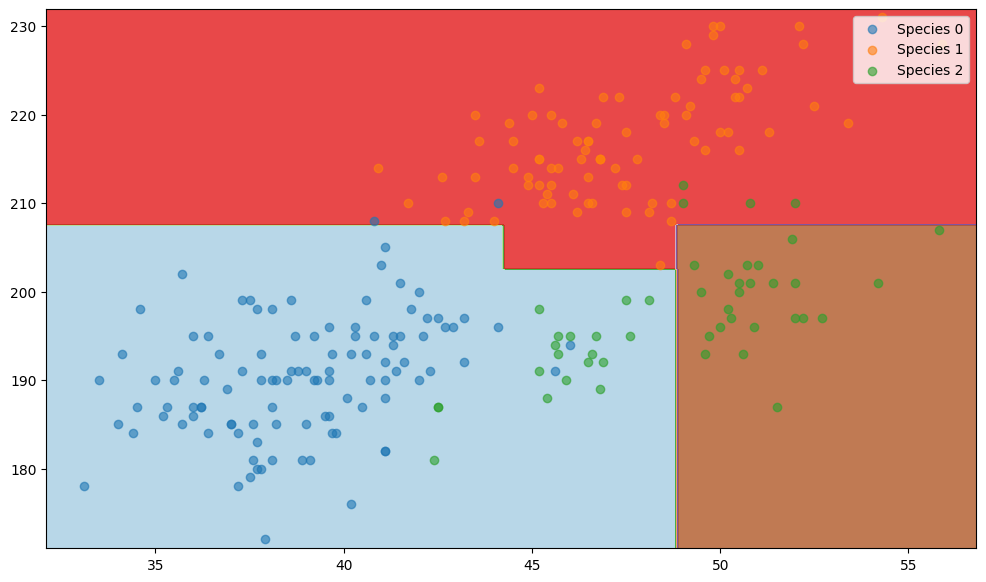

In [36]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
model_adaboost.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_adaboost)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        45
           1       1.00      1.00      1.00        37
           2       1.00      0.52      0.69        21

    accuracy                           0.90       103
   macro avg       0.94      0.84      0.86       103
weighted avg       0.92      0.90      0.89       103



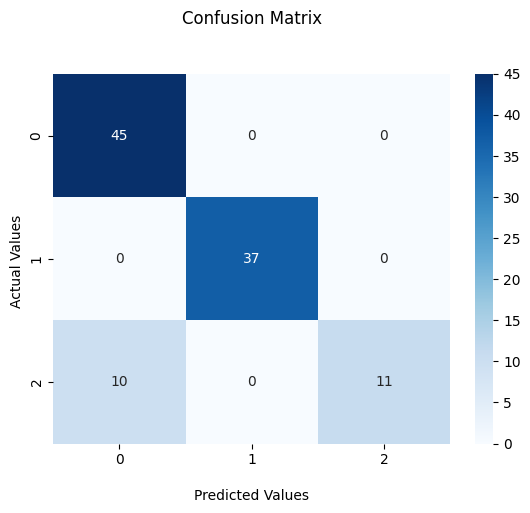

,Model,F1_score
0,Logistic Regression,0.952174
1,KNN,0.919249
2,Tree,0.940291
3,SVM,0.952174
4,Random Forest,0.940291
5,AdaBoost,0.862500


In [37]:
calculate_metrics(model_adaboost, 'AdaBoost', X_test, y_test)

#### Ensembling – Zespół klasyfikatorów

##### Voting Ensemble

C:\Users\GTata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\GTata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\GTata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


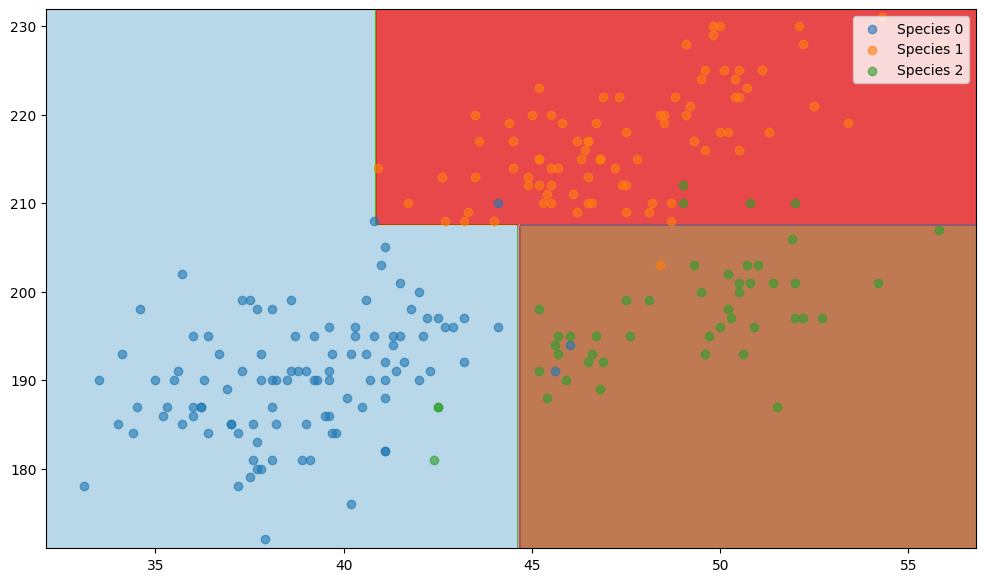

In [38]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)],
                                voting='soft')

model_voting.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_voting)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      0.97      0.99        37
           2       0.90      0.86      0.88        21

    accuracy                           0.95       103
   macro avg       0.95      0.94      0.94       103
weighted avg       0.95      0.95      0.95       103



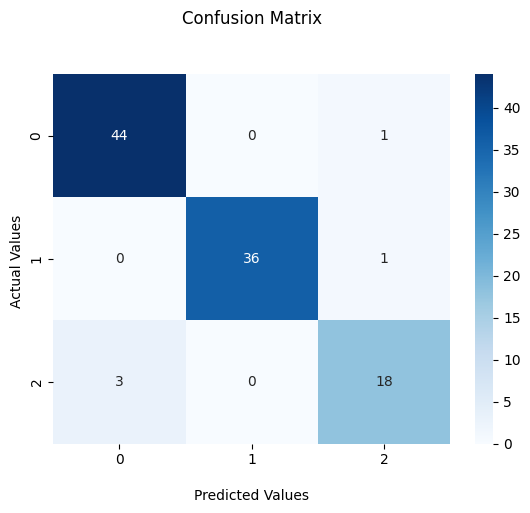

,Model,F1_score
0,Logistic Regression,0.952174
1,KNN,0.919249
2,Tree,0.940291
3,SVM,0.952174
4,Random Forest,0.940291
5,AdaBoost,0.862500
6,VotingClassifier,0.940291


In [39]:
calculate_metrics(model_voting, 'VotingClassifier', X_test, y_test)

##### Klasyfikacja na podstawie wielu zmiennych

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

In [41]:
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 5, 'min_samples_leaf': 3}


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



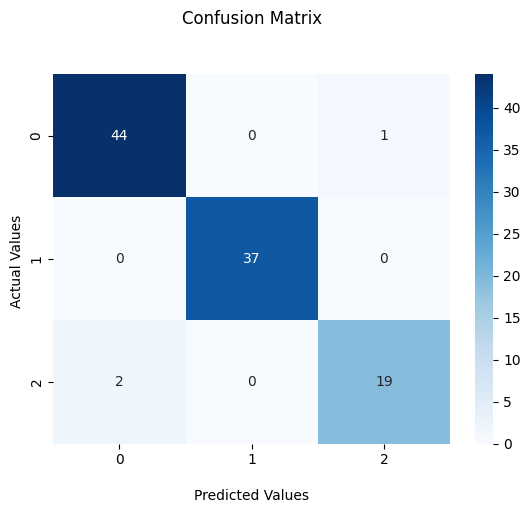

,Model,F1_score
0,Logistic Regression,0.952174
1,KNN,0.919249
2,Tree,0.940291
3,SVM,0.952174
4,Random Forest,0.940291
5,AdaBoost,0.862500
6,VotingClassifier,0.940291
7,Random Forest v2,0.964621


In [42]:
calculate_metrics(rf_model_v2, 'Random Forest v2', X_test, y_test)